                                        Mental Health in Tech Survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.mosaicplot import mosaic


In [ ]:
raw_data = pd.read_csv('D:\DataScience\Assignment-1_optional\survey.csv')
raw_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
#Replacing unreasonable age values with the mean of the ramaining values
raw_data.Age.replace(99999999999, np.nan, inplace=True)
raw_data.Age.replace(329, np.nan, inplace=True)
raw_data.Age.replace(-29, np.nan, inplace=True)
raw_data.Age.replace(-1726, np.nan, inplace=True)
raw_data.Age.replace(5, np.nan, inplace=True)
raw_data.Age.replace(-1, np.nan, inplace=True)
raw_data.Age.replace(8, np.nan, inplace=True)
raw_data.Age.replace(11, np.nan, inplace=True)
raw_data.Age.replace(np.nan, int(raw_data.Age.mean()),  inplace=True)

In [ ]:
country_p = raw_data['Country'].value_counts()
fig = px.choropleth(country_p, locations = country_p.index, locationmode = 'country names',  color = country_p.values,
              hover_name = country_p.index, labels = {'color': 'Count of people'},
              color_continuous_scale = px.colors.sequential.Rainbow, template = "plotly_white")
fig.update_layout(title_text='Participation of People in Survey from different Countries', title_x = 0.5)
fig.show()

More People from USA have participated in the Survey. Totally people more than 700 have done the survey.
The total people participating in the survey is much greater than all the other people participating from different countries.
The second country having more people participation is United Kingdom with more than 100 but less than 200 people.
We can see that there is great gap between the people participation in USA and United Kingdom.Most of the countries have total people participation less than 10.
This shows that the distribution of people participation from various countries is not even and is skewed greatly towards USA.

In [ ]:
fig = px.histogram(raw_data, x = 'Age', color = 'family_history', labels = {'family_history': 'Mental Illness Known in Family'},
                   template = "plotly_white", color_discrete_sequence = px.colors.qualitative.Light24)
fig.update_layout(title_text = "Family History of Mental Illness known through Different Ages of People", title_x = 0.5)
fig.show()

Here, we can see that most people who have done the survey are from ages 25 to 35 where the highest peak is around 32-33 .
As we go away from the highest peak, we can see that the values further away are rarer. So people from ages below 20 and people from ages above 50 have less number of people participating in the survey.
We can see how people have know about their family history. There is a great deal of overlapping of values for both people who have family history of mental health issues and those who don’t. So all ages have aware of Mental Health issues faced by their members of families
The distribution of people who have family history of mental health issues has higher and wider distribution than people who have no family history of mental health issues.

In [ ]:
corr = pd.crosstab(raw_data.seek_help, raw_data.supervisor,
                   rownames = ['Employer providing help'],
                   colnames = ['Employee reaching out to Supervisor'],
                   dropna = False)
corr

Employee reaching out to Supervisor,No,Some of them,Yes
Employer providing help,,,
Don't know,113,110,140
No,226,173,247
Yes,54,67,129


In [ ]:
fig = px.imshow(corr, color_continuous_scale = px.colors.sequential.Inferno)
fig.update_layout(title_text = "Correlation between Employer providing Help & Employee reaching out to Supervisor",
                  title_x = 0.5)

fig.show()

From this heat map, we can see that employees who are provided with help do prefer to seek help from their supervisor most of the time (100 -140 ) and least prefer to not ask when provided with help (=<60).
But while the employer doesn’t provide help, most people still seek help from their supervisor (>240) and also most don’t (200-220)
An average amount of people are not aware if their employer is providing help or not for Mental Health Issue. (No awareness)

In [ ]:
size_benefits = pd.crosstab(raw_data.no_employees, raw_data.benefits, dropna = False)
size_benefits

benefits,Don't know,No,Yes
no_employees,,,
1-5,32,111,19
100-500,65,32,79
26-100,114,74,101
500-1000,21,4,35
6-25,98,132,60
More than 1000,78,21,183


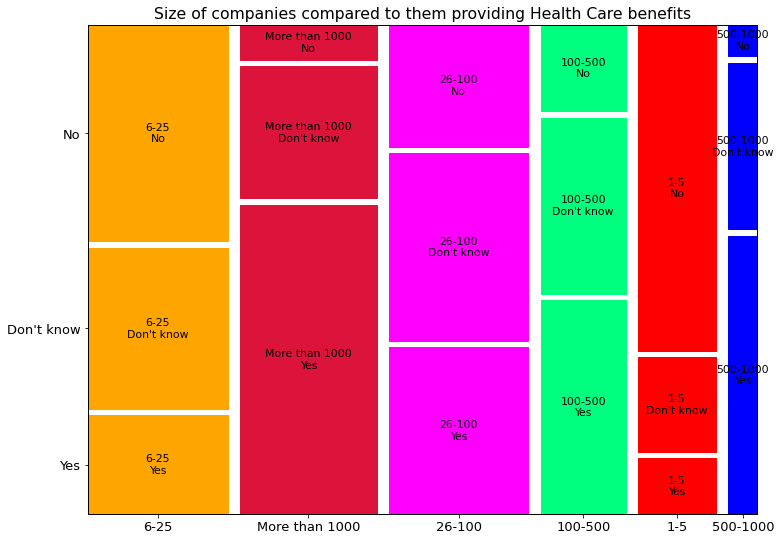

In [ ]:
fig, axes = plt.subplots(figsize = (12,9))
plt.rcParams['font.size'] = '13'
props = lambda key: {'color': 'r' if '1-5' in key 
                     else 'orange' if '6-25' in key
                     else 'magenta' if '26-100' in key
                     else 'springgreen' if '100-500' in key
                     else 'b' if '500-1000' in key
                    else 'crimson' }
mosaic(raw_data,['no_employees', 'benefits'], ax = axes,
       title = 'Size of companies compared to them providing Health Care benefits', properties = props, gap = 0.02,)
plt.show()

We can see that companies with a lot of people (more than 100, 500-1000, more than 1000) mostly provide health care benefits to their employers
Companies with lower amount of people (1-25 people) mostly don’t provide their employers with mental health care benefits to their employers

In [ ]:
raw_data['Gender'] = raw_data['Gender'].replace(['M', 'Male', 'male','m','Male-ish', 'maile',
                                          'something kinda male?','Cis Male','Mal', 'Male (CIS)',
                                           'Make','Guy (-ish) ^_^', 'male leaning androgynous',
                                           'Male ', 'Man', 'msle', 'Mail','cis male',
                                           'Malr','ostensibly male, unsure what that really means','Cis Man'], 'Male')
raw_data['Gender'] = raw_data['Gender'].replace(['Female','female','Trans-female','Cis Female', 'F','Woman',
                                            'f','Femake', 'woman','Female ','cis-female/femme','Trans woman',
                                             'Female (trans)','Female (cis)', 'femail'], 'Female')
raw_data['Gender'] = raw_data['Gender'].replace(['queer/she/they','non-binary','Nah', 'All', 'Enby','fluid', 'Genderqueer',
                                            'Androgyne', 'Agender','Neuter','queer','A little about you','p'], 'Genderqueer/Other')
a = pd.crosstab(raw_data.Gender, raw_data.coworkers, dropna = False)

gen_cowork = raw_data.loc[:,['Gender','coworkers']]
a = np.ones(gen_cowork.shape[0])
gen_cowork['to_count'] = a
tab = pd.pivot_table(gen_cowork, values = 'to_count', index = 'Gender', columns = 'coworkers', aggfunc = np.sum)

fig = px.bar(tab, x = tab.index, y = tab.columns, barmode = 'group', labels ={ 'coworkers': 'Discussing with coworkers'},
            color_discrete_sequence = px.colors.qualitative.Light24, template = 'plotly_white')
fig.update_layout(title_text = "People of different Genders discussing MH issues with Coworkers", title_x = 0.5,
                  xaxis = {'categoryorder':'total descending'})
fig.show()

Male group dominates the whole group of people who have done the survey and a great number of people belonging to gender prefer to only talk to some of their coworkers about their mental health issues while very few of them prefer to not share about it and little are open about talking it out with their coworkers.
Female group contributes very less to the survey but we can see that the same pattern of the male group follows

In [ ]:
raw_data['supervisor'].value_counts()

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

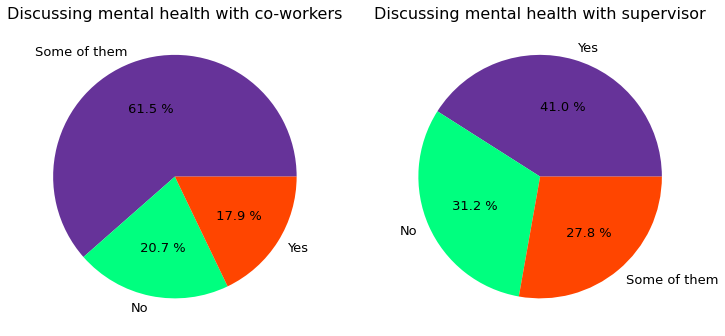

In [ ]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,12))

label1 = raw_data['coworkers'].unique()
label2= raw_data['supervisor'].unique()
t={'fontsize' : 13 }
colors=( 'rebeccapurple', 'springgreen', 'orangered', 'gold','royalblue','lime','sandybrown',  'crimson')

ax1.pie(raw_data['coworkers'].value_counts(),labels = label1,colors = colors,autopct = '% 1.1f %%',textprops = t)
ax1.set_title('Discussing mental health with co-workers',fontsize=16)

ax2.pie(raw_data['supervisor'].value_counts(),labels = label2,colors = colors,autopct = '% 1.1f %%',textprops = t)
ax2.set_title('Discussing mental health with supervisor',fontsize=16)

#plt.savefig('pie.png')
plt.show()

Employees mostly are comfortable with sharing their mental health issues only with some of their coworkers and all their supervisors.

While 30% don’t prefer to share with their supervisors and 20% don’t prefer to share with their coworkers.

In [ ]:
ment_health = dict(raw_data['mental_health_interview'].value_counts())
phys_health = dict(raw_data['phys_health_interview'].value_counts())

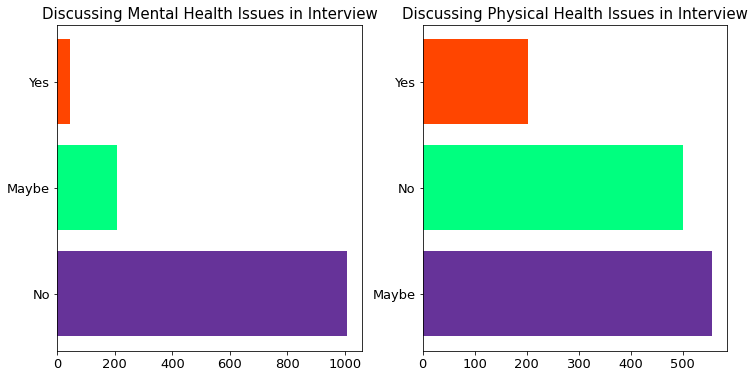

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

x1 = list(ment_health.keys())
y1 = list(ment_health.values())

x2 = list(phys_health.keys())
y2 = list(phys_health.values())

ax1.barh(x1,y1,color=[ 'rebeccapurple', 'springgreen', 'orangered'])
ax1.set_title('Discussing Mental Health Issues in Interview',fontsize=15)

ax2.barh(x2,y2,color=[ 'rebeccapurple', 'springgreen', 'orangered'])
ax2.set_title('Discussing Physical Health Issues in Interview',fontsize=15)

plt.show()

Mostly people do not prefer to mention about their mental health issue in their interview but people consider that maybe they would be able to mention about their physical health issue in their interview.

Less number of people consider it a option to share their mental health issue in a interview and very very few totally agree to discussing it.

When considering the possibility of people discussing their health issue, most people agree for a physical than discussing for a mental health issue.